In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2


from skimage import data

# Metodo de OTSU

### Single Thresholding

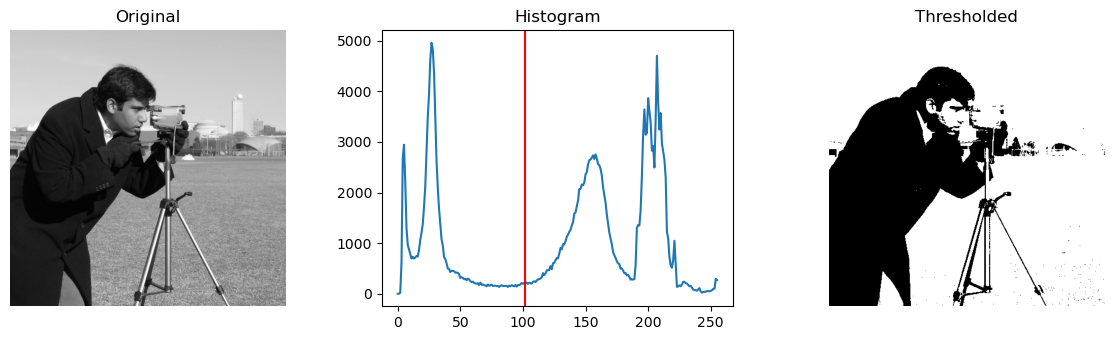

In [2]:
image = data.camera()

thresh, image_seg = cv2.threshold(image, 0, 255, cv2.THRESH_OTSU)

fig, axes = plt.subplots(ncols=3, figsize=(12, 3.5))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].plot(cv2.calcHist([image], [0], None, [256], [0, 256]))
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(image_seg, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

fig.tight_layout()

plt.show()

### Adding Noise to Images

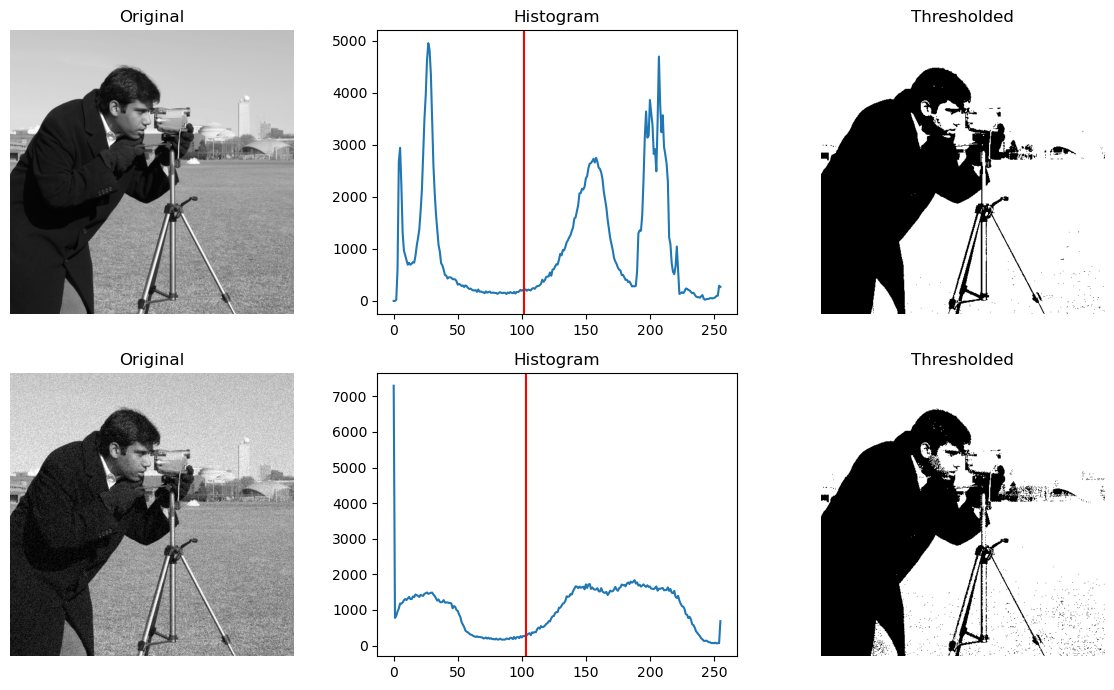

In [3]:
image = data.camera()

# Create noisy image
noise = np.random.randint(-25, 25 + 1, image.shape)
noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)


thresh, image_seg = cv2.threshold(image, 0, 255, cv2.THRESH_OTSU)
noisy_thresh, noisy_image_seg = cv2.threshold(noisy_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].plot(cv2.calcHist([image], [0], None, [256], [0, 256]))
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(image_seg, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')


ax[3].imshow(noisy_image, cmap=plt.cm.gray)
ax[3].set_title('Original')
ax[3].axis('off')

ax[4].plot(cv2.calcHist([noisy_image], [0], None, [256], [0, 256]))
ax[4].set_title('Histogram')
ax[4].axvline(noisy_thresh, color='r')

ax[5].imshow(noisy_image_seg, cmap=plt.cm.gray)
ax[5].set_title('Thresholded')
ax[5].axis('off')

fig.tight_layout()

plt.show()

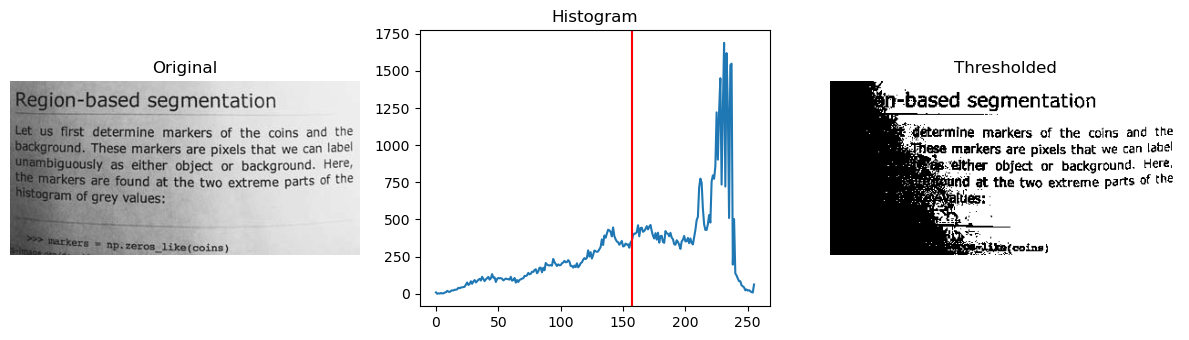

In [4]:
image = data.page()

thresh, image_seg = cv2.threshold(image, 0, 255, cv2.THRESH_OTSU)

fig, axes = plt.subplots(ncols=3, figsize=(12, 3.5))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].plot(cv2.calcHist([image], [0], None, [256], [0, 256]))
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(image_seg, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

fig.tight_layout()

plt.show()

In [5]:
def split(image, ncols=2, nrows=2, channels=1):
    image_height, image_width = image.shape

    tile_height, tile_width = (image_height // nrows, image_width // ncols)

    bytelength = image.nbytes // image.size

    return np.lib.stride_tricks.as_strided(
            image, 
            shape=(image_height // tile_height,
                image_width // tile_width,
                tile_height,
                tile_width,
                channels),
            strides=(image_width * tile_height * bytelength * channels,
                    tile_width * bytelength * channels,
                    image_width * bytelength * channels,
                    bytelength * channels,
                    bytelength)
            )

In [23]:
def tiled_otsu(image, Tx=3, Ty=3, type=cv2.THRESH_OTSU):
    tiles = split(image, ncols=Tx, nrows=Ty)

    images = []
    for i in range(0,Ty):
        row = []
        for j in range(0,Tx):
            th, seg = cv2.threshold(tiles[i,j], 0, 255, type)
            row.append(seg)
        images.append(row)

    return cv2.vconcat([ cv2.hconcat(tile) for tile in images ])

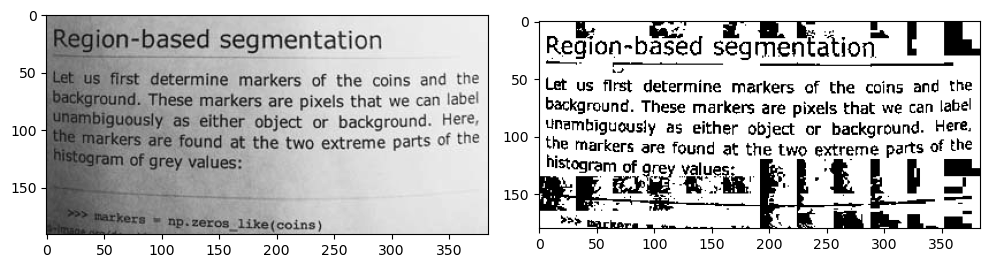

In [30]:
image = data.page()

image_seg = tiled_otsu(image, Tx=12, Ty=12, type=cv2.THRESH_OTSU)

fig, ax = plt.subplots(ncols=2, figsize=(10,8))

ax[0].imshow(image, cmap='gray')
ax[1].imshow(image_seg, cmap='gray')
plt.tight_layout()